In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


DATA TRANSFORMATION & DATA PROCESSING

In [15]:
means = np.mean(ninja_data, axis=0)  # Calculate mean along columns (axis=0)
print(means)
stdevs = np.std(ninja_data, axis=0)    # Calculate standard deviation along columns (axis=0)

data_centered = ninja_data - means

normalized_data = data_centered / stdevs

Time                        50.000000
Temperature                 19.977372
Pressure                  1013.033617
Chemical Concentration       4.989754
dtype: float64


In [9]:
norm = np.linalg.norm(ninja_data)     # To find the norm of the array
print("df normalized", norm)
print("df mean", norm.mean())
print("df standar deviation", norm.std())


fourier = np.fft.fft(normalized_data)
fourier

df normalized 32096.92300021508
df mean 32096.92300021508
df standar deviation 0.0


array([[-0.23791558+0.j        , -3.17593736-0.45957541j,
        -0.33148819+0.j        , -3.17593736+0.45957541j],
       [-0.37405383+0.j        , -3.19606604-0.25866636j,
        -0.14123617+0.j        , -3.19606604+0.25866636j],
       [-0.08512412+0.j        , -3.09965234-0.0597767j ,
        -0.60913685+0.j        , -3.09965234+0.0597767j ],
       ...,
       [ 3.03525513+0.j        ,  0.30622188-0.10912956j,
         3.24586677+0.j        ,  0.30622188+0.10912956j],
       [ 2.68414524+0.j        ,  0.40094875-0.04250512j,
         3.42137934+0.j        ,  0.40094875+0.04250512j],
       [ 2.99655844+0.j        ,  0.41621081+0.03968773j,
         3.09229843+0.j        ,  0.41621081-0.03968773j]])

2. Statistical Analysis:

Goal: Extract statistical insights from the data.
Steps and Hints:

Descriptive Statistics: Use pandas describe() function to get an overview of the data.

Correlation Analysis: Calculate and interpret the correlation between variables using pandas corr() function.

Inferential Statistics: Consider conducting hypothesis tests or regression analysis to draw deeper insights.

Tools: Explore scipy.stats for advanced statistical functions.

In [10]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


In [12]:
corr = ninja_data.corr()
print(corr)

                            Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Concentration  
Time                                 -0.156113  
Temperature                          -0.003277  
Pressure                             -0.000863  
Chemical Concentration                1.000000  


<Axes: >

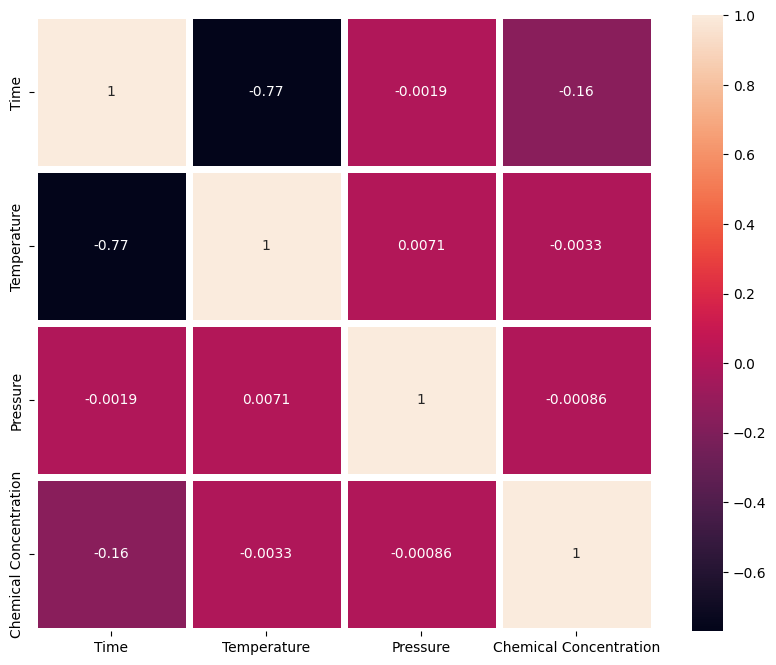

In [13]:
f = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True,  linewidths=5)

For most of the variables, the correlation is not significant besides the inverse relationship between tempeture and time. This implies that as temperture or time goes up the other one goes down .


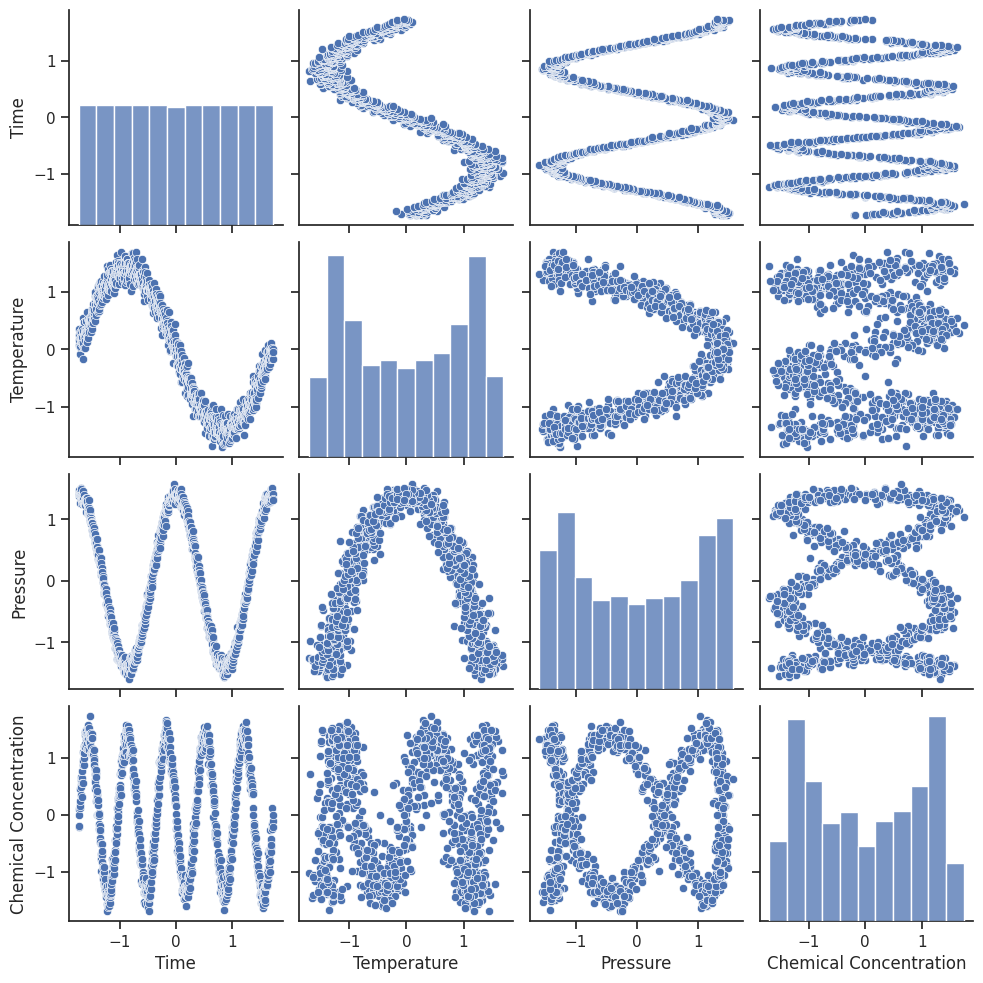

In [16]:
sns.set_theme(style="ticks")

sns.pairplot(normalized_data)

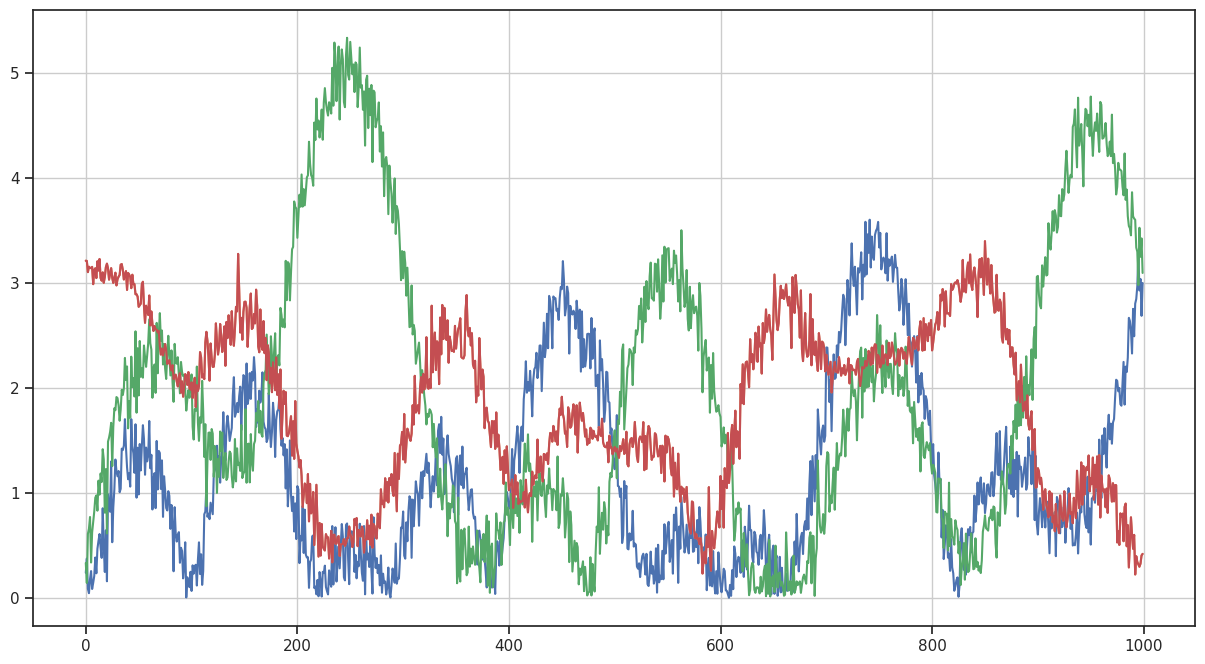

In [17]:
f = plt.subplots(figsize=(15,8))
plt.plot( np.abs(fourier))  # Plot the absolute value of the Fourier transform

plt.grid(True)


plt.show()

DATA INTERPRETATION:
Given this Fourier transformation, it shows that there are some categories that have higher amplittude than others.

The temperature, depicted by the red line, exhibits a gradual change over time without any sudden or abrupt shifts.
The pressure, represented by the blue line, shows some abrupt change but still expected .
The chemical concentration, represented by green line, shows abrupt chane.


Practical Usage:
This project could be practically used by climate scientist, pharmacologists and in energy management.